##Scrapping Google Apps Review - eg Gojek
Week 2 NLP Pipeline PBA/ Gasal 2025/ from : Irmasari Hafidz irma@its.ac.id

In [ ]:
!pip install google_play_scraper -q
!pip install textblob -q
!pip install seaborn -q

In [ ]:
from google_play_scraper import app
import pandas as pd
import numpy as np
import sklearn
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
import textblob
#from wordcloud import WordCloud
from pathlib import Path
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

import pickle
import re
import time
import datetime                              # access to %%time, for timing individual notebook cells
import os
from PIL import Image
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

%matplotlib inline
%config InlineBackend.figure_format='retina'

# Import seaborn styles explicitly
import seaborn as sns
# Apply the seaborn style before creating plots
sns.set_style("whitegrid")  # This line sets the Seaborn style

plt.rcParams["figure.figsize"] = (15,10)

In [ ]:
#Android App Gojek from Google Play at
#https://play.google.com/store/apps/details?id=com.gojek.app
#The apps ID found in the link after id=com.gojek.app
#Dated 3 March 2025 and N of reviews 787K

from google_play_scraper import app, Sort, reviews_all

gojek_reviews = reviews_all(
    'com.gojek.app',
    sleep_milliseconds=0, # defaults to 0
    lang='en', # defaults to 'en'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
)

In [ ]:
#Save Gojek reviews into dataframe
df_gjkrev = pd.DataFrame(np.array(gojek_reviews),columns=['content'])
df_gjkrev = df_gjkrev.join(pd.DataFrame(df_gjkrev.pop('content').tolist()))
df_gjkrev.to_csv(r'df_gjkrev', index=False)

## Homework TUGAS 1A

NLP Pipeline:
RAW data (save to csv) lakukan:

* Tokenization
* Lowering
* Stopword Removal
* Lemmatization
* Stemming
* Punctuations Removal
* Expand Contractions
* Spelling Correction
* Rare Words Removal
* Common Words Removal

(save as cleandata.csv)
* Frequent words (n=50,100,1000)
* Frequent Words found (new), contoh: yg, bs, tyt
* ditambahkan di stopwords removal
* Stopwords removal (NLTK, misal case study review hanya dalam Indonesia n=758)


In [ ]:
df_gjkrev

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,0cb559ab-7fbe-4bc5-9348-e087c8270965,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Only 500 characters! Gofood gone downhill. Eli...,2,0,5.30.1,2025-09-08 02:45:13,"Hi John, we apologize for the inconvenience. T...",2025-09-08 07:00:08,5.30.1
1,b2673225-ccb7-494d-a275-df01a8f7cd05,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"[Update] Terkadang mengalami masalah, termasuk...",4,0,5.30.1,2025-09-08 02:30:18,"Hai Kak Aditya, mohon maaf atas ketidaknyamana...",2025-08-29 14:52:11,5.30.1
2,7835e8e8-4c5a-42b3-955c-794fde4b2207,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Good driver,4,0,4.74.2,2025-09-08 01:28:41,None,NaT,4.74.2
3,d8078d68-918c-4c98-be78-cdd1b5c2396d,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,oke,5,0,5.30.1,2025-09-08 01:05:19,None,NaT,5.30.1
4,8827a549-8cd9-4dd0-b899-0d3a4c492835,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,ditambahkan menu share route untuk tracking,4,0,5.30.1,2025-09-08 00:44:39,None,NaT,5.30.1
...,...,...,...,...,...,...,...,...,...,...,...
225973,f224a376-506a-441d-816d-0ff108b940a8,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Love this app,5,0,1.0.1,2014-12-30 21:11:06,None,NaT,1.0.1
225974,3546eecc-a4d2-43de-8cdd-aa86ee424e28,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Akhirnya keluar juga!,5,0,1.0.1,2014-12-24 15:20:26,None,NaT,1.0.1
225975,b9440de2-b3a5-4f18-87cc-b27ad37ab081,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Finally,5,0,1.0.1,2014-12-23 05:04:16,None,NaT,1.0.1
225976,f39b66db-4fff-445a-abc2-74df2d54e2fe,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Helpful,4,0,None,2014-12-20 16:41:52,None,NaT,None


In [ ]:
df_gjkrev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225978 entries, 0 to 225977
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   reviewId              225978 non-null  object        
 1   userName              225978 non-null  object        
 2   userImage             225978 non-null  object        
 3   content               225943 non-null  object        
 4   score                 225978 non-null  int64         
 5   thumbsUpCount         225978 non-null  int64         
 6   reviewCreatedVersion  193385 non-null  object        
 7   at                    225978 non-null  datetime64[ns]
 8   replyContent          34939 non-null   object        
 9   repliedAt             34939 non-null   datetime64[ns]
 10  appVersion            193385 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 19.0+ MB


In [ ]:
#We do not need data for column reviewId, userName, userImage so
#we will show only these column
df_gjkrev.loc[:,["content","score","thumbsUpCount", "reviewCreatedVersion", "at", "replyContent", "repliedAt"]]

,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,Only 500 characters! Gofood gone downhill. Eli...,2,0,5.30.1,2025-09-08 02:45:13,"Hi John, we apologize for the inconvenience. T...",2025-09-08 07:00:08
1,"[Update] Terkadang mengalami masalah, termasuk...",4,0,5.30.1,2025-09-08 02:30:18,"Hai Kak Aditya, mohon maaf atas ketidaknyamana...",2025-08-29 14:52:11
2,Good driver,4,0,4.74.2,2025-09-08 01:28:41,None,NaT
3,oke,5,0,5.30.1,2025-09-08 01:05:19,None,NaT
4,ditambahkan menu share route untuk tracking,4,0,5.30.1,2025-09-08 00:44:39,None,NaT
...,...,...,...,...,...,...,...
225973,Love this app,5,0,1.0.1,2014-12-30 21:11:06,None,NaT
225974,Akhirnya keluar juga!,5,0,1.0.1,2014-12-24 15:20:26,None,NaT
225975,Finally,5,0,1.0.1,2014-12-23 05:04:16,None,NaT
225976,Helpful,4,0,None,2014-12-20 16:41:52,None,NaT


In [ ]:
#Check number of reviews scores
df_gjkrev['score'].value_counts()

,count
score,
5,123145
1,50994
4,21976
3,15496
2,14367


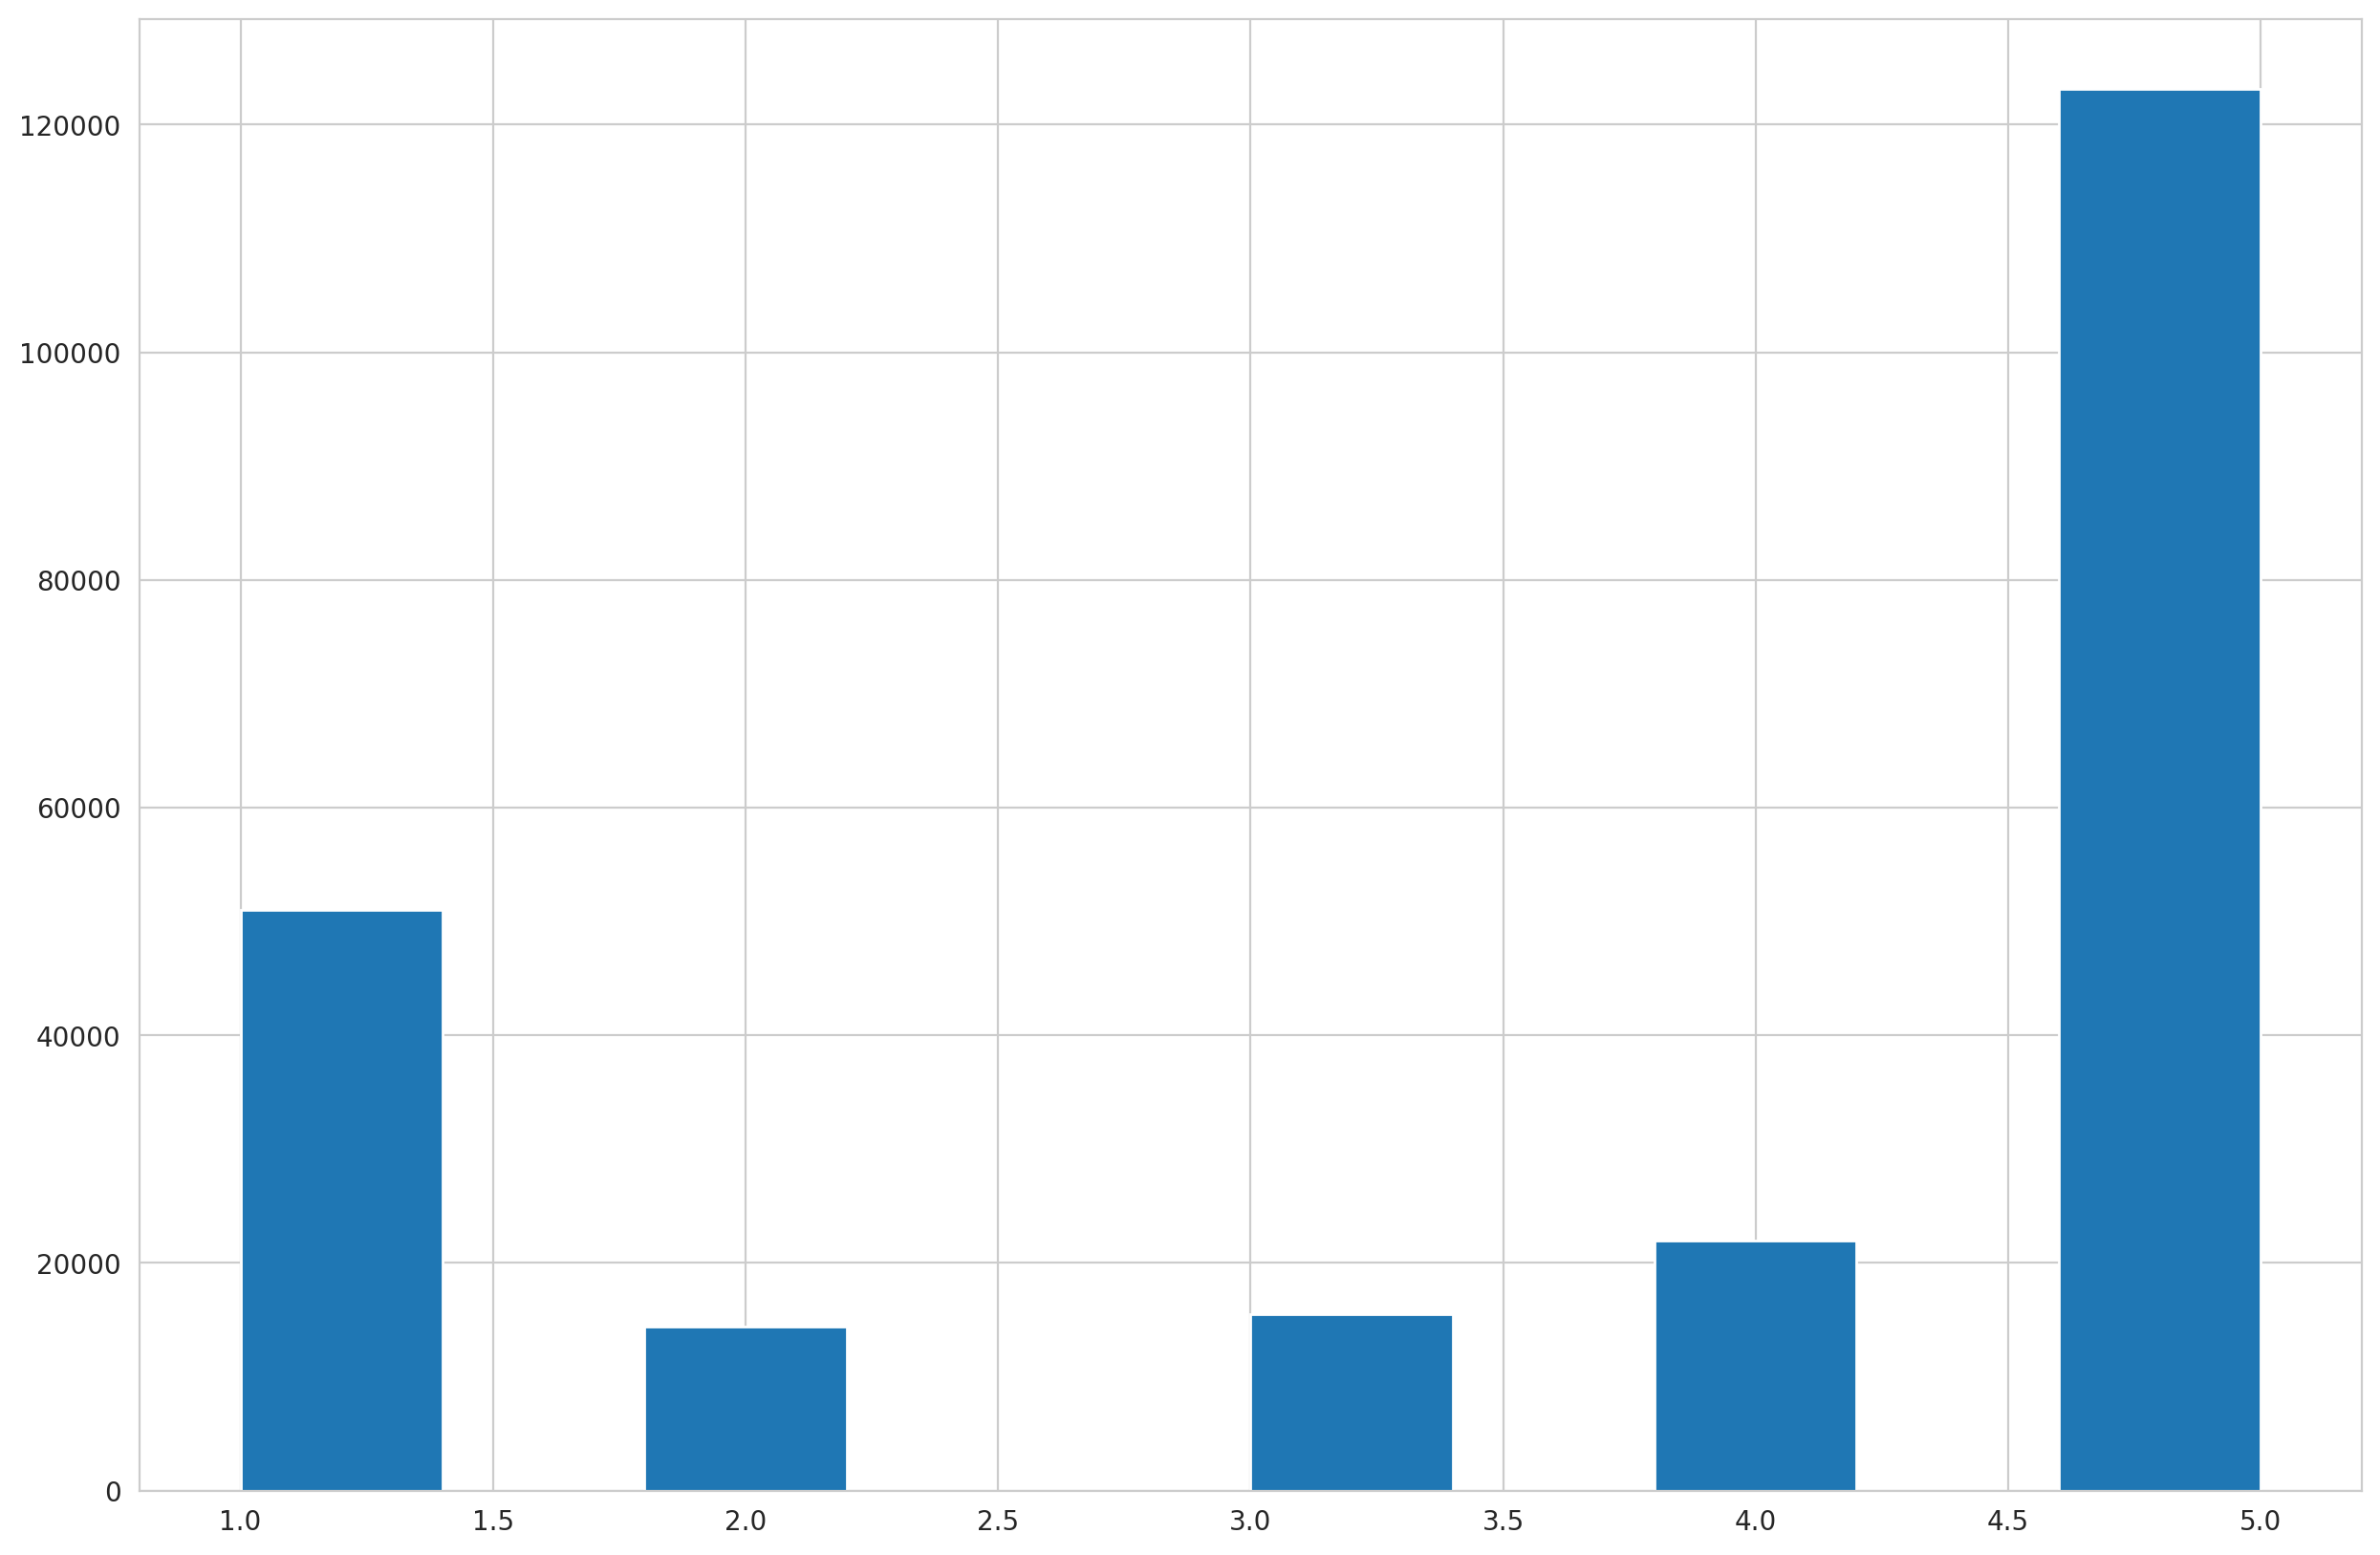

In [ ]:
plt.hist(df_gjkrev['score'])
plt.show()

In [ ]:
!pip install emoji

import numpy as np
import pandas as pd
pd.set_option("display.max_colwidth", 200)
#from pandas_profiling import ProfileReport
import regex
import nltk
import wordcloud
import textblob

from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

import string
import re
import emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 26.3 MB/s eta 0:00:00


In [ ]:
#Creating polarity on the column: content (review from the apps) using TextBlob
#Read https://textblob.readthedocs.io/en/dev/quickstart.html

from textblob import TextBlob
# Handle None values in 'content' column by replacing them with empty strings
df_gjkrev['sentiment_polarity'] = df_gjkrev['content'].astype(str).apply(lambda x: TextBlob(x).polarity)
df_gjkrev['sentiment_subjective'] = df_gjkrev['content'].astype(str).apply(lambda x: TextBlob(x).subjectivity)

In [ ]:
df_gjkrev.loc[:,["content","score","sentiment_polarity", "sentiment_subjective"]]

,content,score,sentiment_polarity,sentiment_subjective
0,Only 500 characters! Gofood gone downhill. Eliminated map when driver found now silly cartoon. delivery prices way high in many cases now. i use plus but even with that more than i paid before. de...,2,0.070278,0.540139
1,"[Update] Terkadang mengalami masalah, termasuk baru-baru ini istri mengirim barang melalui gosend namun dikirim ke alamat dan orang yang salah. Komplain ke CS melalui aplikasi hanya dijawab mohon ...",4,0.000000,0.000000
2,Good driver,4,0.700000,0.600000
3,oke,5,0.000000,0.000000
4,ditambahkan menu share route untuk tracking,4,0.000000,0.000000
...,...,...,...,...
225973,Love this app,5,0.500000,0.600000
225974,Akhirnya keluar juga!,5,0.000000,0.000000
225975,Finally,5,0.000000,1.000000
225976,Helpful,4,0.000000,0.000000


## Lowercasing

In [ ]:
#DATA PREPROCESSING
# Lower casing
# Change the reviews type to string
df_gjkrev['content'] = df_gjkrev['content'].astype(str)# Before lowercasing
# Before lowercasing
print(df_gjkrev['content'][188])
print(df_gjkrev['content'][1])
print(df_gjkrev['content'][20100])

Kalo di bandara ga bisa dapet.. bodoh banget ya dari dulu ga da peningkatan
[Update] Terkadang mengalami masalah, termasuk baru-baru ini istri mengirim barang melalui gosend namun dikirim ke alamat dan orang yang salah. Komplain ke CS melalui aplikasi hanya dijawab mohon maaf kasus ditutup tanpa solusi. Saya sampai harus komplain lewat review baru kemudian dibalas. Namun saya memutuskan untuk tetap support karena problem juga jarang terjadi dan senantiasa me-review performa app dan layanan Gojek.
Sudah pakai lebih dari 2 tahun gk ada masalah, mudah dan simple, sering banget buat pesen makan jd gk perlu keluar rumah


In [ ]:
#Lowercase all reviews to see the difference
df_gjkrev['content']= df_gjkrev['content'].apply(lambda x: x.lower())
print(df_gjkrev['content'][188])
print(df_gjkrev['content'][1])
print(df_gjkrev['content'][20100])

kalo di bandara ga bisa dapet.. bodoh banget ya dari dulu ga da peningkatan
[update] terkadang mengalami masalah, termasuk baru-baru ini istri mengirim barang melalui gosend namun dikirim ke alamat dan orang yang salah. komplain ke cs melalui aplikasi hanya dijawab mohon maaf kasus ditutup tanpa solusi. saya sampai harus komplain lewat review baru kemudian dibalas. namun saya memutuskan untuk tetap support karena problem juga jarang terjadi dan senantiasa me-review performa app dan layanan gojek.
sudah pakai lebih dari 2 tahun gk ada masalah, mudah dan simple, sering banget buat pesen makan jd gk perlu keluar rumah


##Stopwords Removal
Indonesian Stopwords

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Get Indonesian stopwords
indonesian_stopwords = stopwords.words('indonesian')

# Display first 20 stopwords
print(indonesian_stopwords[:20])

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#edited from https://www.tensorscience.com/nlp/sentiment-analysis-tutorial-in-python-classifying-reviews-on-movies-and-products
import string

df_gjkrev['wordCount'] = [len(review.split()) for review in df_gjkrev['content']]
df_gjkrev['uppercaseCharCount'] = [sum(char.isupper() for char in review) \
                              for review in df_gjkrev['content']]
df_gjkrev['specialCharCount'] = [sum(char in string.punctuation for char in review) \
                            for review in df_gjkrev['content']]

In [ ]:
df_gjkrev.loc[:,["content","score","sentiment_polarity", "sentiment_subjective","wordCount","uppercaseCharCount","specialCharCount"]]

,content,score,sentiment_polarity,sentiment_subjective,wordCount,uppercaseCharCount,specialCharCount
0,only 500 characters! gofood gone downhill. eliminated map when driver found now silly cartoon. delivery prices way high in many cases now. i use plus but even with that more than i paid before. de...,2,0.070278,0.540139,81,0,11
1,"[update] terkadang mengalami masalah, termasuk baru-baru ini istri mengirim barang melalui gosend namun dikirim ke alamat dan orang yang salah. komplain ke cs melalui aplikasi hanya dijawab mohon ...",4,0.000000,0.000000,61,0,9
2,good driver,4,0.700000,0.600000,2,0,0
3,oke,5,0.000000,0.000000,1,0,0
4,ditambahkan menu share route untuk tracking,4,0.000000,0.000000,6,0,0
...,...,...,...,...,...,...,...
225973,love this app,5,0.500000,0.600000,3,0,0
225974,akhirnya keluar juga!,5,0.000000,0.000000,3,0,1
225975,finally,5,0.000000,1.000000,1,0,0
225976,helpful,4,0.000000,0.000000,1,0,0


In [ ]:
#Add a column name polarity_rating from changing the score of the review into 3 labels: Pos, Negative Neutral
df_gjkrev['sentiment_rating'] = df_gjkrev['score'].apply(lambda x: 'Positive' if x > 3 else('Neutral' if x == 3  else 'Negative'))

In [ ]:
df_gjkrev.loc[:,["content","score","sentiment_polarity", "sentiment_subjective","sentiment_rating"]]

,content,score,sentiment_polarity,sentiment_subjective,sentiment_rating
0,only 500 characters! gofood gone downhill. eliminated map when driver found now silly cartoon. delivery prices way high in many cases now. i use plus but even with that more than i paid before. de...,2,0.070278,0.540139,Negative
1,"[update] terkadang mengalami masalah, termasuk baru-baru ini istri mengirim barang melalui gosend namun dikirim ke alamat dan orang yang salah. komplain ke cs melalui aplikasi hanya dijawab mohon ...",4,0.000000,0.000000,Positive
2,good driver,4,0.700000,0.600000,Positive
3,oke,5,0.000000,0.000000,Positive
4,ditambahkan menu share route untuk tracking,4,0.000000,0.000000,Positive
...,...,...,...,...,...
225973,love this app,5,0.500000,0.600000,Positive
225974,akhirnya keluar juga!,5,0.000000,0.000000,Positive
225975,finally,5,0.000000,1.000000,Positive
225976,helpful,4,0.000000,0.000000,Positive


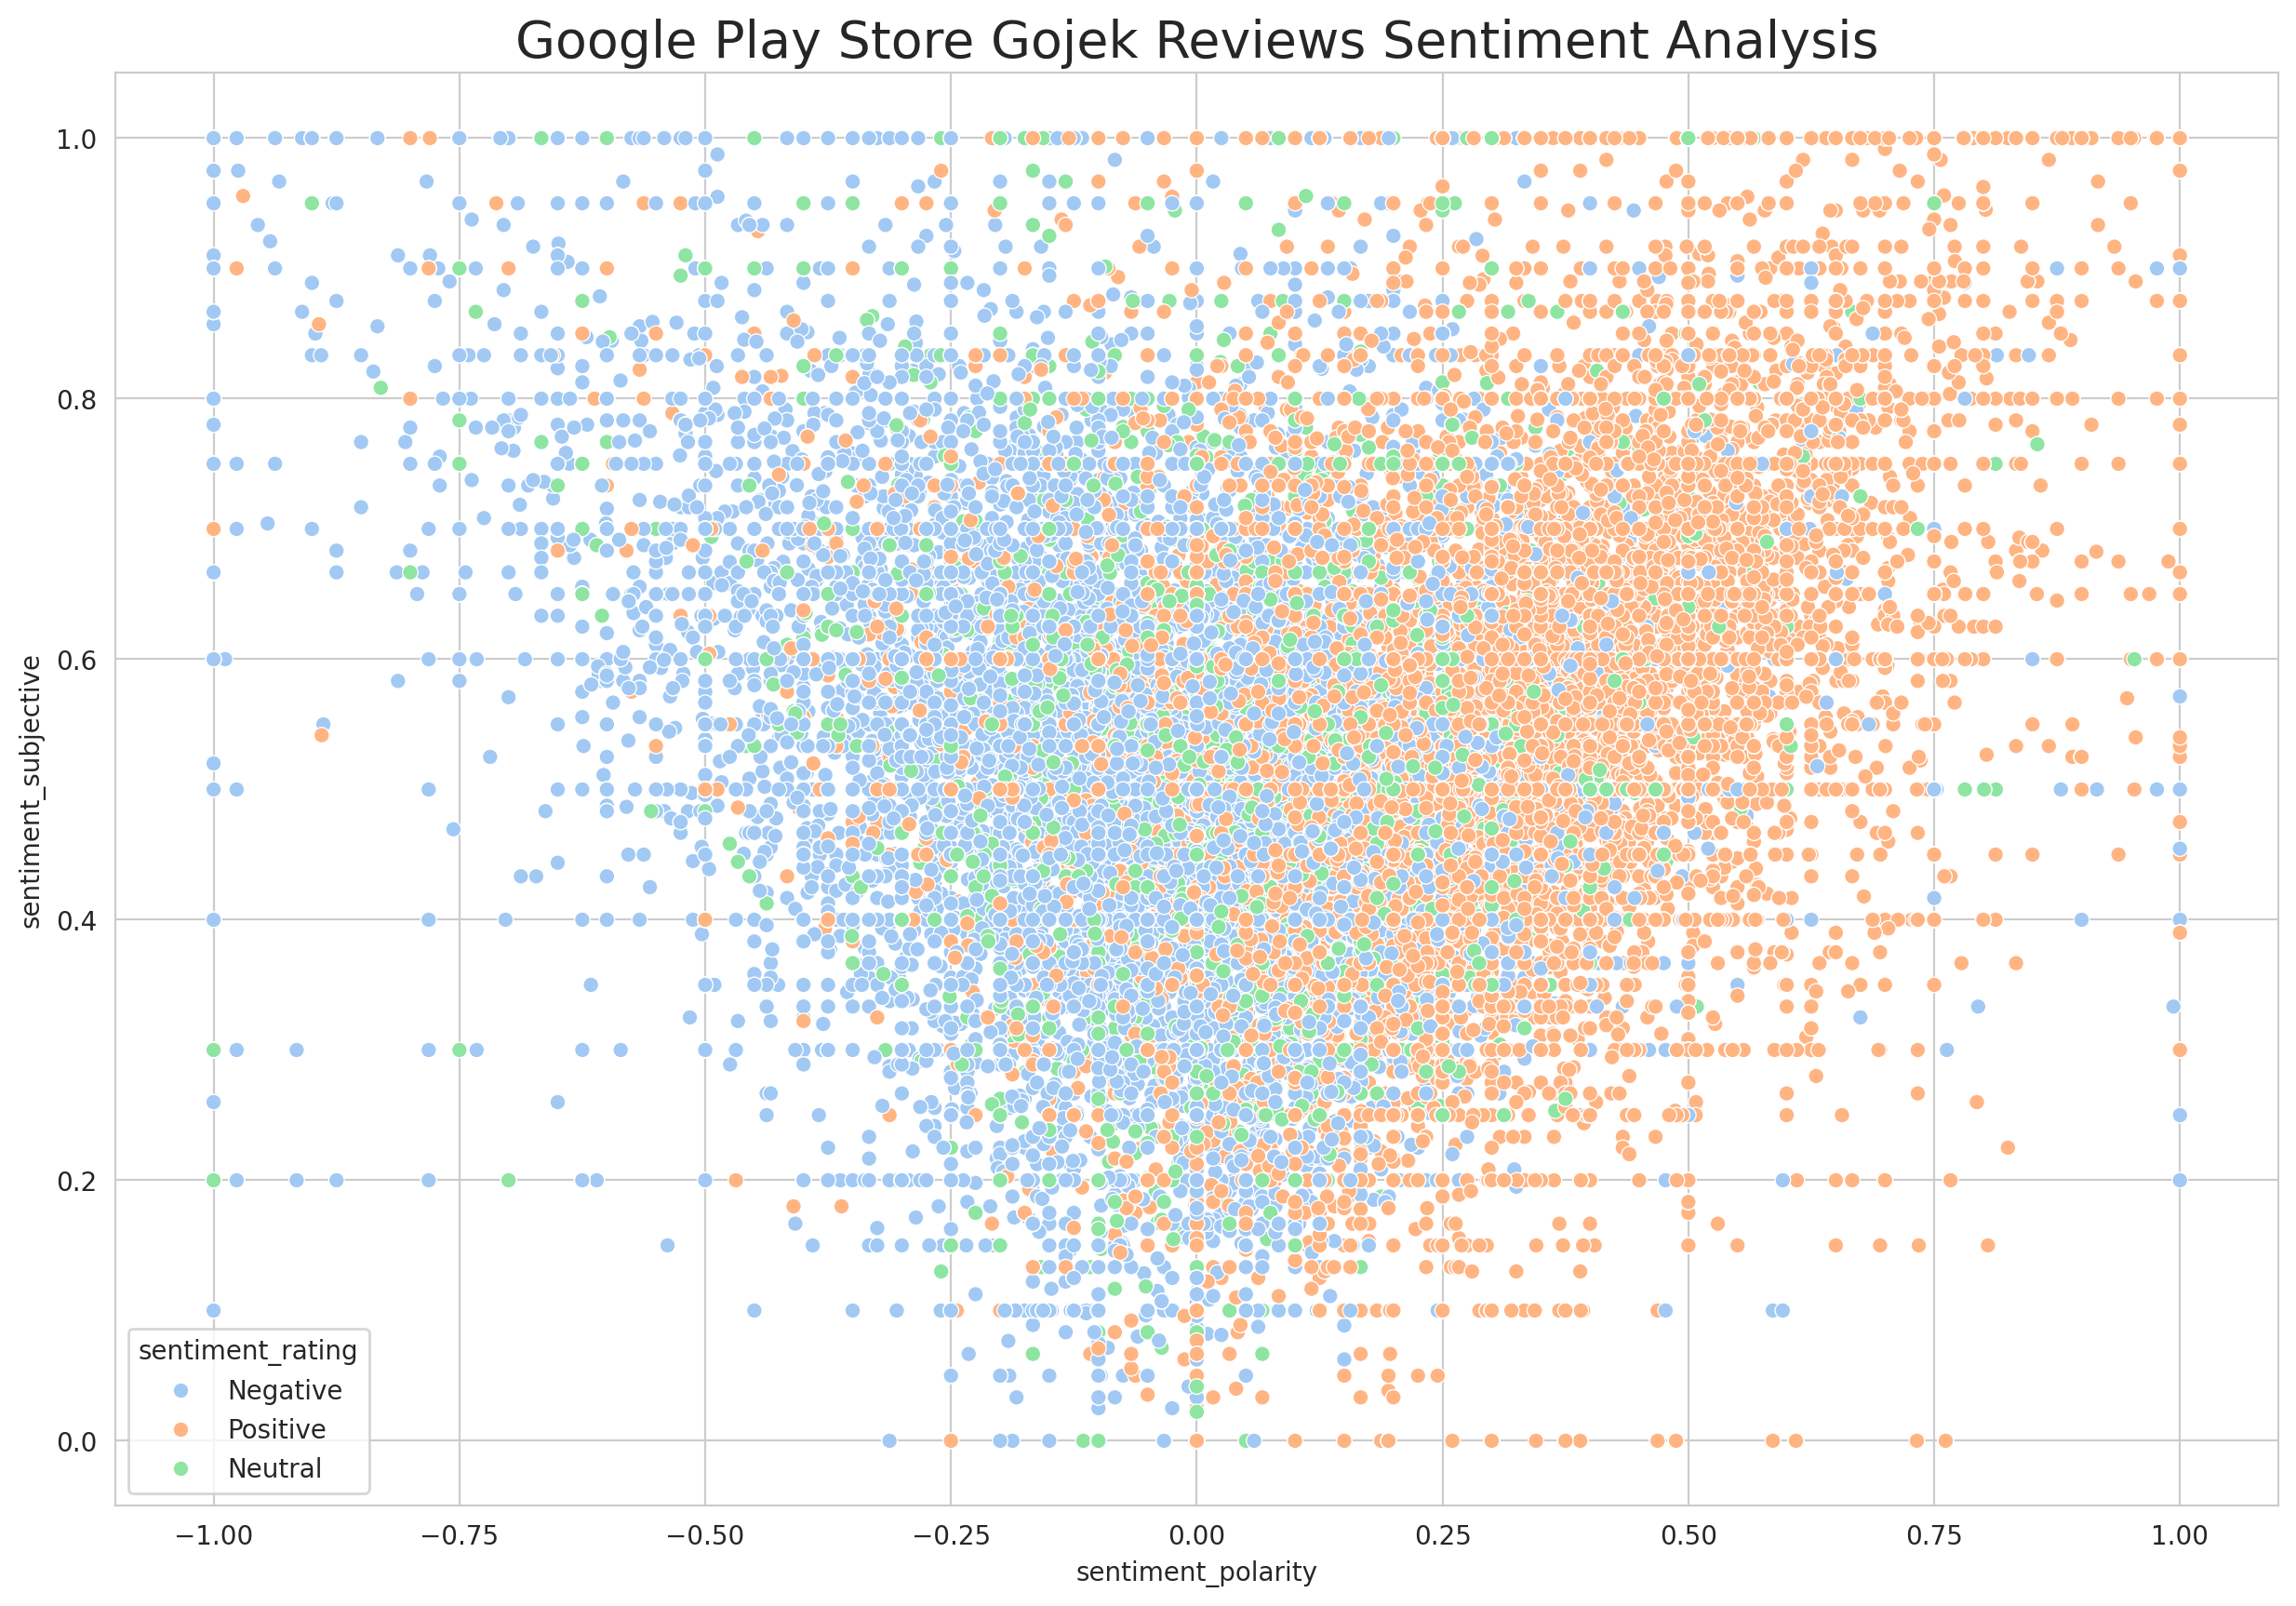

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
# Specify x and y using the 'x' and 'y' parameters within sns.scatterplot
sns.scatterplot(x=df_gjkrev['sentiment_polarity'], y=df_gjkrev['sentiment_subjective'],
                hue=df_gjkrev['sentiment_rating'], edgecolor='white', palette="pastel")
plt.title("Google Play Store Gojek Reviews Sentiment Analysis", fontsize=20)
plt.show()

In [ ]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  #Import FreqDist from nltk.probability
  from nltk.probability import FreqDist
  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms)
  plt.figure(figsize=(20,5))
  # Use the 'rainbow' colormap for the bar plot
  ax = sns.barplot(data=d, x= "word", y = "count", palette="rainbow")
  ax.set(ylabel = 'Count')
  plt.show()

/tmp/ipython-input-2152088084.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=d, x= "word", y = "count", palette="rainbow")


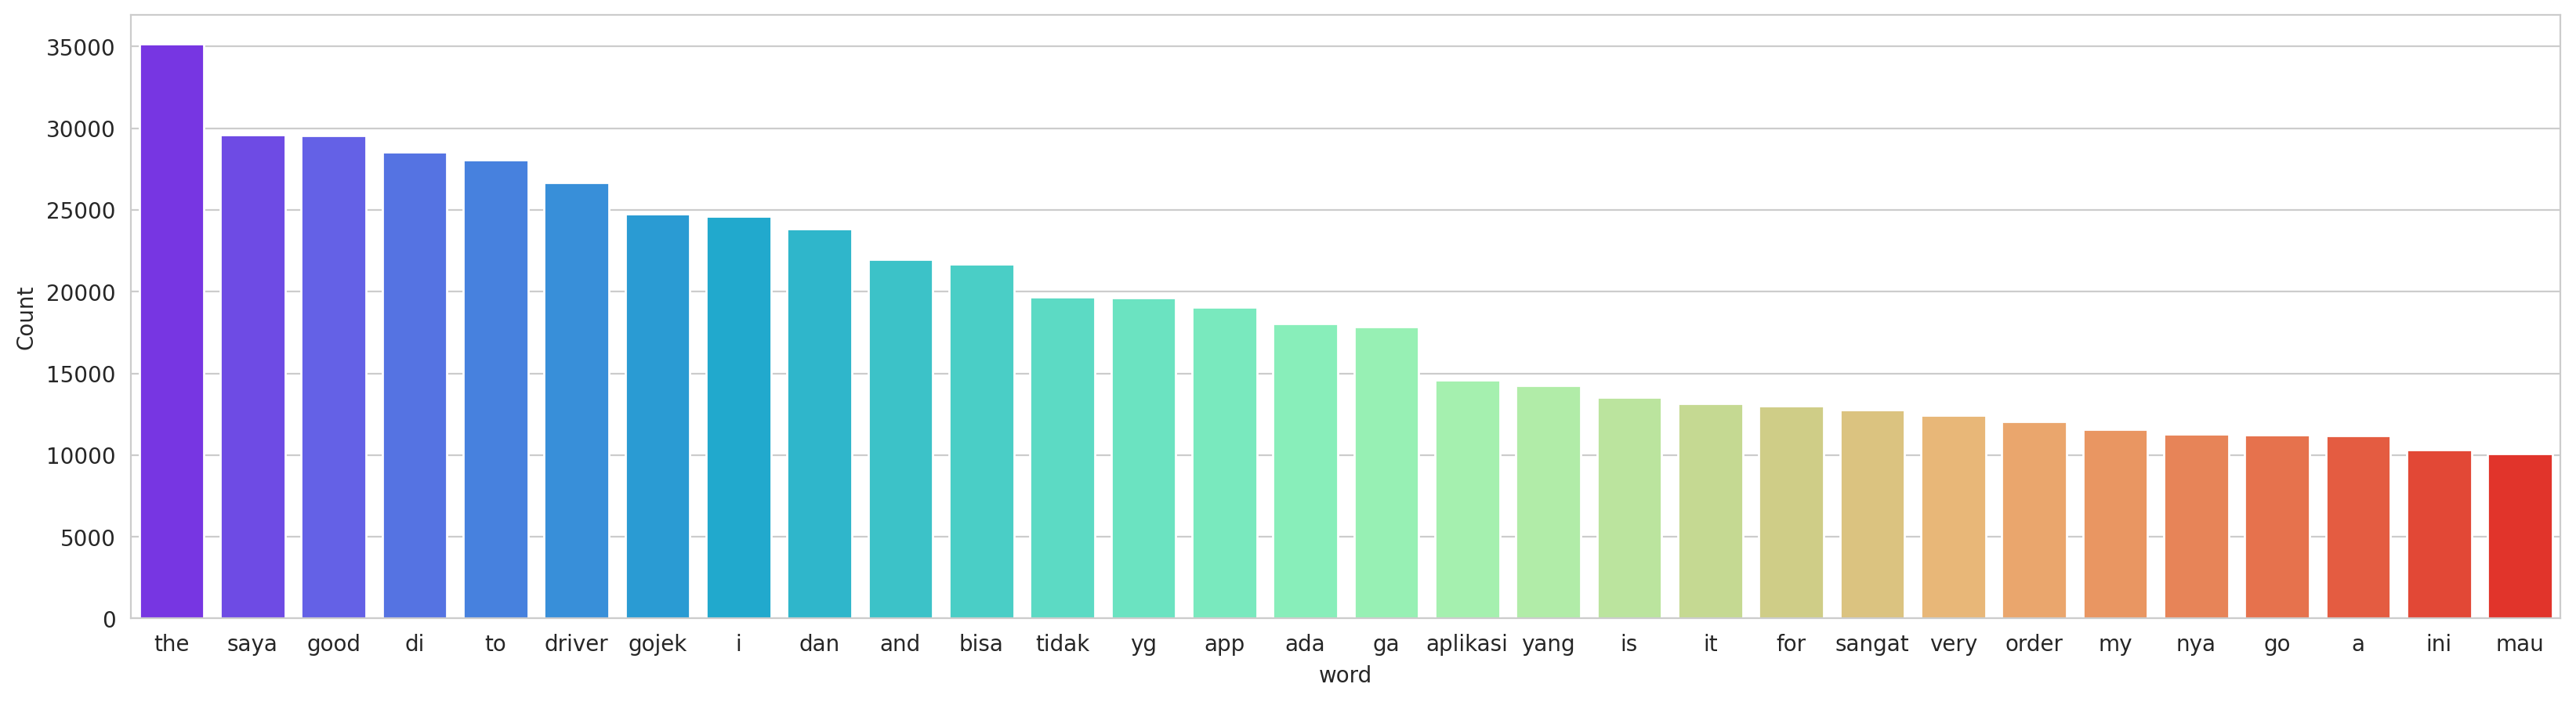

In [ ]:
freq_words(df_gjkrev['content'])

In [ ]:
# prompt: the [content] column hasnt been applied Indonesian stopwords removal using Sastrawi

!pip install Sastrawi

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Create stopword remover
factory = StopWordRemoverFactory()
stopword_remover = factory.create_stop_word_remover()

# Apply stopword removal to the 'content' column
df_gjkrev['content'] = df_gjkrev['content'].apply(lambda x: stopword_remover.remove(x))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 12.5 MB/s eta 0:00:00


In [ ]:
# prompt: can you also apply English stopwords as well to the [content] column

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Get English stopwords
english_stopwords = stopwords.words('english')

# Assuming df_jknrev is your DataFrame and 'content' is the column
df_gjkrev['content'] = df_gjkrev['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in english_stopwords]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# prompt: english_stopwords(len)

# To get the number of English stopwords, use the len() function:
print(len(english_stopwords))

198


In [ ]:
df_gjkrev.loc[:,["content","score","sentiment_polarity", "sentiment_subjective","sentiment_rating"]]

,content,score,sentiment_polarity,sentiment_subjective,sentiment_rating
0,500 characters! gofood gone downhill. eliminated map driver found silly cartoon. delivery prices way high many cases now. use plus even paid before. delivery time estimates sometimes crazy 40min h...,2,0.070278,0.540139,Negative
1,"[update] terkadang mengalami masalah, termasuk baru-baru istri mengirim barang melalui gosend dikirim alamat orang salah. komplain cs melalui aplikasi dijawab mohon maaf kasus ditutup solusi. samp...",4,0.000000,0.000000,Positive
2,good driver,4,0.700000,0.600000,Positive
3,oke,5,0.000000,0.000000,Positive
4,ditambahkan menu share route tracking,4,0.000000,0.000000,Positive
...,...,...,...,...,...
225973,love app,5,0.500000,0.600000,Positive
225974,akhirnya keluar juga!,5,0.000000,0.000000,Positive
225975,finally,5,0.000000,1.000000,Positive
225976,helpful,4,0.000000,0.000000,Positive


In [ ]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  #Import FreqDist from nltk.probability
  from nltk.probability import FreqDist
  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms)
  plt.figure(figsize=(20,5))
  # Use the 'rainbow' colormap for the bar plot
  ax = sns.barplot(data=d, x= "word", y = "count", palette="rainbow")
  ax.set(ylabel = 'Count')
  plt.show()

/tmp/ipython-input-2152088084.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=d, x= "word", y = "count", palette="rainbow")


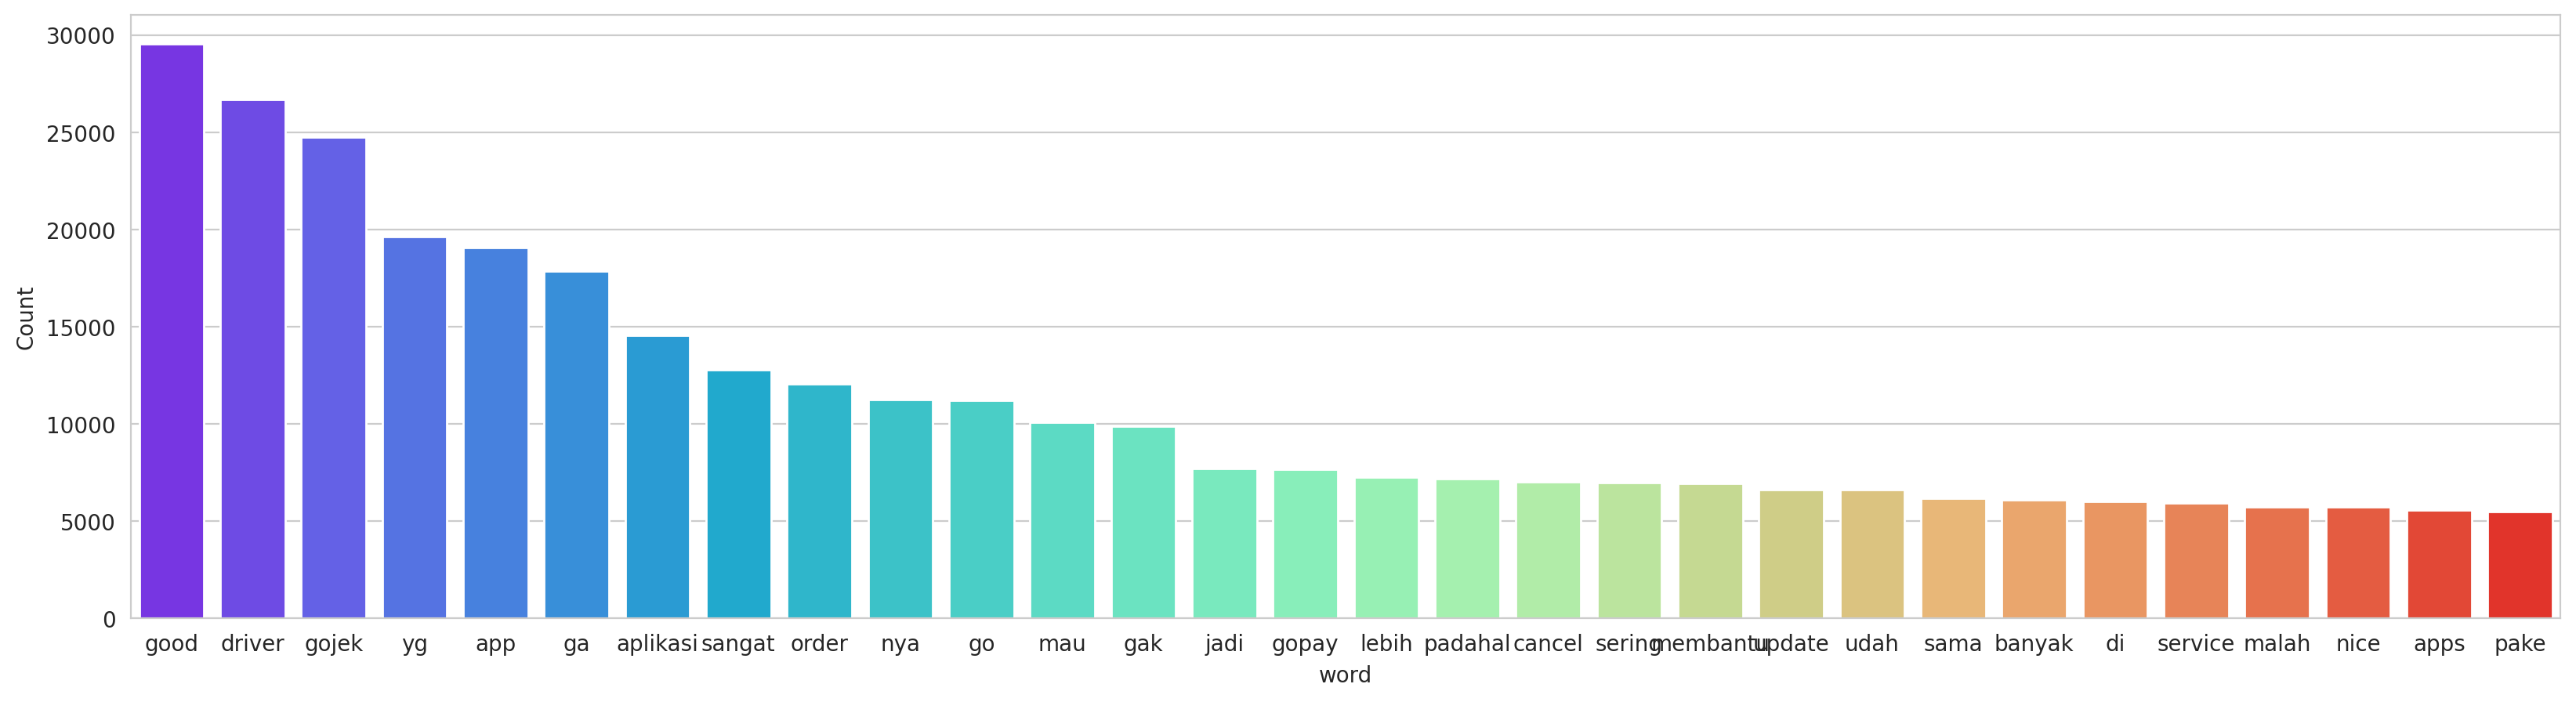

In [ ]:
freq_words(df_gjkrev['content'])

In [ ]:
#Count after stopwords
#edited from https://www.tensorscience.com/nlp/sentiment-analysis-tutorial-in-python-classifying-reviews-on-movies-and-products
import string

df_gjkrev['wordCount'] = [len(review.split()) for review in df_gjkrev['content']]
df_gjkrev['wordCount_after_stopwords'] = [len(review.split()) for review in df_gjkrev['content']]